In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
end = dt.date.today()
today = start = dt.datetime(2023, 1, 1)

data = yf.download('RELIANCE.NS', start=today,end=end,interval='1h')
data = data.dropna()
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-02 09:15:00+05:30,2552.050049,2567.600098,2548.300049,2562.050049,2562.050049,0
2023-01-02 10:15:00+05:30,2562.000000,2569.899902,2558.100098,2563.949951,2563.949951,341398
2023-01-02 11:15:00+05:30,2563.800049,2564.500000,2557.000000,2563.699951,2563.699951,279884
2023-01-02 12:15:00+05:30,2563.050049,2565.399902,2559.949951,2564.100098,2564.100098,199198
2023-01-02 13:15:00+05:30,2564.100098,2569.899902,2562.050049,2562.550049,2562.550049,286293


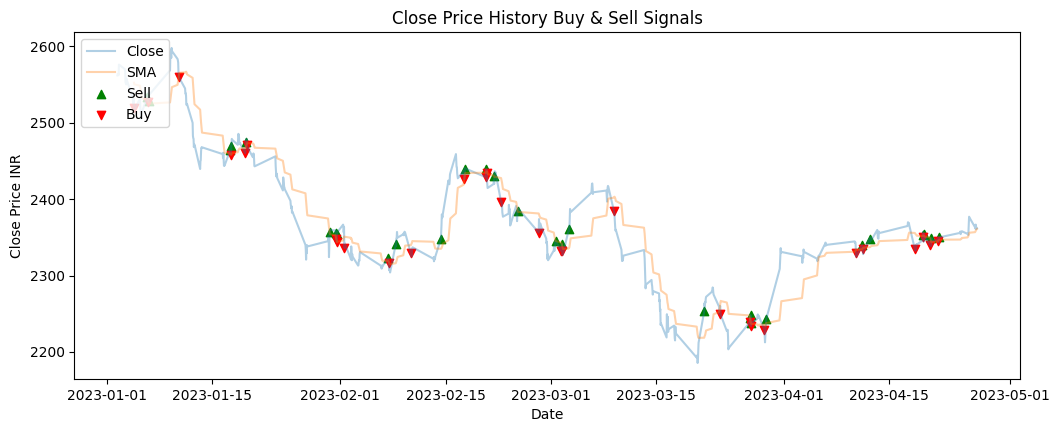

In [3]:
# algorithm to buy and sell stocks
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(len(data)):
        if data['Close'][i] > data['SMA'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['Close'][i] < data['SMA'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Close'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)


# create a new dataframe
new_df = pd.DataFrame()
new_df['Close'] = data['Close']
new_df['SMA'] = data['Close'].rolling(window=20).mean()
new_df['Buy_Signal_Price'] = buy_sell(new_df)[0]
new_df['Sell_Signal_Price'] = buy_sell(new_df)[1]
new_df


# visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['Close'], label='Close', alpha=0.35)
plt.plot(new_df['SMA'], label='SMA', alpha=0.35)
plt.scatter(new_df.index, new_df['Buy_Signal_Price'], label='Sell', marker='^', color='green')
plt.scatter(new_df.index, new_df['Sell_Signal_Price'], label='Buy', marker='v', color='red')
plt.title('Close Price History Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.legend(loc='upper left')
plt.show()